# Home Credit Default Risk

### Loading the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
datapath = 'home-credit-default-risk/data'

In [3]:
app_train = pd.read_csv(datapath + r'/application_train.csv')
app_test = pd.read_csv(datapath + r'/application_test.csv')

In [4]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


After the loading of the main dataset, we are going to load all the secondary data and merge it to the main dataframes.

In [5]:
print(app_train.shape[0])
print(app_test.shape[0])

307511
48744


## Analyzing the app_train dataset

In [6]:
app_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [7]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


Here is the distribution of the **TARGET** label.

(array([282686.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  24825.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

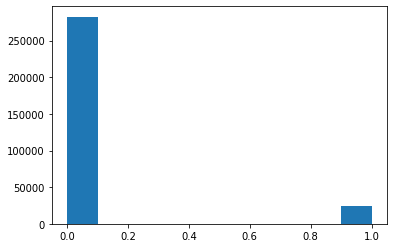

In [8]:
plt.hist(app_train['TARGET'])

As we can see the data we have for the training is **unbalanced**, this means that most of the data points have a certain TARGET label, in our case 0.

In [9]:
round((app_train['TARGET']==0).sum()*100/app_train.shape[0], 2)

91.93

More than 91% of the people don't get a loan.

#### Merging train and test

From now on, we will want to modify app_train and app_test together. For this reason it is useful to merge them. But first we need to create a column to distinguish them.

In [10]:
app_train['dataset'] = 'train'
app_test['dataset'] = 'test'
# we also need to add the TARGET column to data_test
app_test['TARGET'] = np.nan

In [11]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,dataset
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,train
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,train
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,train
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,train
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,train


In [12]:
app_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,dataset,TARGET
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,test,NaN
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0.0,0.0,0.0,0.0,0.0,3.0,test,NaN
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0.0,0.0,0.0,0.0,1.0,4.0,test,NaN
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0.0,0.0,0.0,0.0,0.0,3.0,test,NaN
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,test,NaN


In [13]:
app = app_train.append(app_test, ignore_index=False, sort=True)
app.shape

(356255, 123)

## Data pre-processing

Before merging all the datasets we have, we want to perform some data pre-processing, such as handling missing values or handling categorical variables, such that when we proceed with the feature engineering process the data is already cleaned.

In [15]:
# loading data
bureau = pd.read_csv(datapath + r'/bureau.csv')
bureau_balance = pd.read_csv(datapath + r'/bureau_balance.csv')
cc_balance = pd.read_csv(datapath + r'/credit_card_balance.csv')
payments = pd.read_csv(datapath + r'/installments_payments.csv')
pos_cash = pd.read_csv(datapath + r'/POS_CASH_balance.csv')
prev_app = pd.read_csv(datapath + r'/previous_application.csv')

In [34]:
datasets = [app, bureau, bureau_balance, cc_balance, payments, pos_cash, prev_app]

### Inspecting missing values

One of the first things to do during the data analysis process is to check the missing values in the dataset and the relative amount and percentages.

In [35]:
def check_missing_values(df):
    cols = df.columns
    nan_df = pd.DataFrame(columns=['n_nan', 'perc_nan'])
    
    for col in cols:
        n_nan = pd.isna(df[col]).sum()
        perc = round((n_nan / df.shape[0])*100, 2)
        s = pd.Series({'n_nan': n_nan, 'perc_nan': perc} ,name=col)
        nan_df = nan_df.append(s)
        
    return nan_df.sort_values(by=['n_nan'], ascending=False)

For each loaded dataset we are going to check the missing values and remove the columns with an high percentage of Nan, 70% in this case.

In [41]:
for d in datasets:
    # check the number of missing values for each column
    nan_values = check_missing_values(d)
    # drop the columns with a percentage of missing values over 70%
    cols_to_drop = list(nan_values[nan_values['perc_nan']>=70].index)
    d.drop(columns=cols_to_drop, inplace=True)

### Dealing with outliers

First of all we are going to deal with features which have more significance in the loans domain.  
Thanks to the help of the kaggle table with informations regarding the features, we are able to easly target and work on the variable with outlayers or with anomalies.

Let's start with **CODE_GENDER**.

In [86]:
app_train['CODE_GENDER'].unique()

array(['M', 'F', 'XNA'], dtype=object)

In [87]:
sum(app_train['CODE_GENDER']=='XNA')

4

As we can see there are only 4 rows with an XNA value, so we can drop them.

In [88]:
app_train = app_train[app_train['CODE_GENDER']!='XNA']

In [89]:
app_train.shape

(307507, 122)

## Merging other datasets with *featuretools*

In [14]:
import featuretools as ft

# creating a new entityset
es = ft.EntitySet(id = 'clients')

#### Creating entities

In [16]:
es = es.entity_from_dataframe(entity_id='clients', dataframe=app, index='SK_ID_CURR')

In [17]:
es = es.entity_from_dataframe(entity_id='bureau', dataframe=bureau, index='SK_ID_BUREAU')

In [18]:
es = es.entity_from_dataframe(entity_id='bureau_balance', dataframe=bureau_balance,
                             make_index=True, index='BB_ID')

In [19]:
es = es.entity_from_dataframe(entity_id='prev_app', dataframe=prev_app, index='SK_ID_PREV')

In [20]:
es = es.entity_from_dataframe(entity_id='pos_cash_balance', dataframe=pos_cash, 
                              make_index=True, index='BALANCE_ID')

In [21]:
es = es.entity_from_dataframe(entity_id='payments', dataframe=payments, 
                              make_index=True, index='PAYMENT_ID')

In [22]:
es = es.entity_from_dataframe(entity_id='cc_balance', dataframe=cc_balance, 
                              make_index=True, index='CC_BALANCE_ID')

#### Creating relationships between entities

Relationships based on SK_ID_CURR

In [24]:
bureau_r = ft.Relationship(es['clients']['SK_ID_CURR'],
                          es['bureau']['SK_ID_CURR'])
prev_app_r = ft.Relationship(es['clients']['SK_ID_CURR'],
                          es['prev_app']['SK_ID_CURR'])
pos_cash_r = ft.Relationship(es['clients']['SK_ID_CURR'],
                          es['pos_cash_balance']['SK_ID_CURR'])
payments_r = ft.Relationship(es['clients']['SK_ID_CURR'],
                          es['payments']['SK_ID_CURR'])
cc_balance_r = ft.Relationship(es['clients']['SK_ID_CURR'],
                          es['cc_balance']['SK_ID_CURR'])

Other relationships

In [25]:
bureau_balance_r = ft.Relationship(es['bureau']['SK_ID_BUREAU'],
                          es['bureau_balance']['SK_ID_BUREAU'])

In [27]:
es = es.add_relationships([bureau_r, bureau_balance_r, prev_app_r, pos_cash_r, payments_r, cc_balance_r])

In [28]:
es

Entityset: clients
  Entities:
    clients [Rows: 356255, Columns: 123]
    bureau [Rows: 1716428, Columns: 17]
    bureau_balance [Rows: 27299925, Columns: 4]
    prev_app [Rows: 1670214, Columns: 37]
    pos_cash_balance [Rows: 10001358, Columns: 9]
    payments [Rows: 13605401, Columns: 9]
    cc_balance [Rows: 3840312, Columns: 24]
  Relationships:
    bureau.SK_ID_CURR -> clients.SK_ID_CURR
    bureau_balance.SK_ID_BUREAU -> bureau.SK_ID_BUREAU
    prev_app.SK_ID_CURR -> clients.SK_ID_CURR
    pos_cash_balance.SK_ID_CURR -> clients.SK_ID_CURR
    payments.SK_ID_CURR -> clients.SK_ID_CURR
    cc_balance.SK_ID_CURR -> clients.SK_ID_CURR

#### Choosing feature primitives

Before perfoming the deep feature synthesis (**dfs**) we need to evaluate and choose the feature primitives to utilize both for single tables (**transformations**) and for merging (**aggregations**).  
Specifically, in our case we are going to use just some trasformations, because we want to keep the feature engineering process manual. So, let's take a look at the options that *feature tools* offers.

In [33]:
primitives = ft.list_primitives()
primitives[primitives['type']=='aggregation']

,name,type,description
0,count,aggregation,"Determines the total number of values, excludi..."
1,last,aggregation,Determines the last value in a list.
2,skew,aggregation,Computes the extent to which a distribution di...
3,median,aggregation,Determines the middlemost number in a list of ...
4,entropy,aggregation,Calculates the entropy for a categorical variable
5,std,aggregation,Computes the dispersion relative to the mean v...
6,first,aggregation,Determines the first value in a list.
7,min,aggregation,"Calculates the smallest value, ignoring `NaN` ..."
8,mean,aggregation,Computes the average for a list of values.
9,any,aggregation,Determines if any value is 'True' in a list.


In our case we want to keep the number of features as low as possible, due to low computing power, but at the same time we want those features to have the highest possible statistical meaning. Thus, we are going to aggregate the tables using:
- **median**: for numerical features
- **percent_true**: for boolean features

## Data pre-processing

### Categorical features and Label encoding

Let's see how many features in the dataset are categorical, that means that are not integers or floats.

In [26]:
def get_cat_features(df):
    cat_features = {}
    for col in df.columns:
        if df[col].dtype == object:
            cat_features[col] = df[col].nunique()

    cat_features = pd.DataFrame.from_dict(cat_features, columns=['classes'], orient='index')
    return cat_features

In [31]:
cat_features_train = get_cat_features(data_train)
cat_features_train

,classes
NAME_CONTRACT_TYPE_x,2
CODE_GENDER,3
FLAG_OWN_CAR,2
FLAG_OWN_REALTY,2
NAME_TYPE_SUITE_x,7
NAME_INCOME_TYPE,8
NAME_EDUCATION_TYPE,5
NAME_FAMILY_STATUS,6
NAME_HOUSING_TYPE,6
OCCUPATION_TYPE,18


The same analysis can be performed on the test dataset.

In [32]:
cat_features_test = get_cat_features(data_test)
cat_features_test

,classes
NAME_CONTRACT_TYPE_x,2
CODE_GENDER,2
FLAG_OWN_CAR,2
FLAG_OWN_REALTY,2
NAME_TYPE_SUITE_x,7
NAME_INCOME_TYPE,7
NAME_EDUCATION_TYPE,5
NAME_FAMILY_STATUS,5
NAME_HOUSING_TYPE,6
OCCUPATION_TYPE,18


In [29]:
set(cat_features_test.index == cat_features_train.index)

{True}

As we can see the train and the test dataset have the same variables, but with different number of classes.

In [30]:
print("There are %d categorical variables" % len(cat_features_train))

There are 35 categorical variables


Now we need to convert all the categorical features into numbers, otherwise most models won't be able to deal with them.  
We have 2 ways to do it:
1. via **Label Encoding**: encoding each class into an integer
2. via **one-hot Encoding**: each class will be converted into a new column in the dataframe.

The first method is useful only when a variable has 1 or 2 classes but it is not good for encoding variables with more classes.

So, first thing, we are going to convert each variable with max 2 classes through Label Encoding.

In [33]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

In [34]:
def label_encoding(df, cat_features):
    for index, row in cat_features.iterrows():
        if row[0] <= 2:
            df[index] = LE.fit_transform(df[index].to_list())

In [35]:
label_encoding(data_train, cat_features_train)
label_encoding(data_test, cat_features_test)

In [36]:
print("There are %d categorical variables in app_train" % len(get_cat_features(data_train)))
print("There are %d categorical variables in app_test" % len(get_cat_features(data_test)))

There are 30 categorical variables in app_train
There are 29 categorical variables in app_test


For the categorical variable with more tha 2 classes we are going to perform, instead, one-hot encoding using the **pd.get_dummies()** function.

In [37]:
data_train = pd.get_dummies(data_train, prefix_sep='_', drop_first=True)
data_test = pd.get_dummies(data_test, prefix_sep='_', drop_first=True)

The *drop_first=True* attribute drops one column for each categorical feature to avoid multicollinearity.

In [38]:
print("There are %d categorical variables in app_train" % len(get_cat_features(data_train)))
print("There are %d categorical variables in app_test" % len(get_cat_features(data_test)))

There are 0 categorical variables in app_train
There are 0 categorical variables in app_test


In [39]:
print(data_train.shape)
print(data_test.shape)

(307511, 404)
(48744, 397)


Now the train and test datasets have different number of columns due to the encoding, so we need to keep just the common columns between the 2 dataframes.

In [40]:
# we need to keep the target column since we will need it for the training
target = data_train['TARGET']
data_train, data_test = data_train.align(data_test, join = 'inner', axis = 1)
data_train['TARGET'] = target

In [41]:
print(data_train.shape)
print(data_test.shape)

(307511, 396)
(48744, 395)
